In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv').dropna()
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
input_features = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']].replace(to_replace=('female','male'), value=(1,0))
output_features = train_data['Survived'].to_numpy()
#numeric_dict_ds = tf.data.Dataset.from_tensor_slices((dict(input_features), output_features))
input_features = dict(input_features)

In [5]:
inputs = {}
for name, column in input_features.items():
  inputs[name] = tf.keras.Input(
      shape=(1,), name=name, dtype=tf.float32)

inputs

{'Pclass': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Pclass')>,
 'Sex': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Sex')>,
 'Age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Age')>,
 'SibSp': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'SibSp')>,
 'Parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'Parch')>}

In [6]:
def stack_dict(inputs, fun=tf.stack):
    values = []
    for key in sorted(inputs.keys()):
      values.append(tf.cast(inputs[key], tf.float32))

    return fun(values, axis=-1)

In [7]:
x = stack_dict(inputs, fun=tf.concat)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(stack_dict(dict(input_features)))

x = normalizer(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs, x)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              run_eagerly=True)

2022-10-17 20:51:16.104169: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-10-17 20:51:16.240337: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Age (InputLayer)                [(None, 1)]          0                                            
__________________________________________________________________________________________________
Parch (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
Pclass (InputLayer)             [(None, 1)]          0                                            
__________________________________________________________________________________________________
Sex (InputLayer)                [(None, 1)]          0                                            
______________________________________________________________________________________________

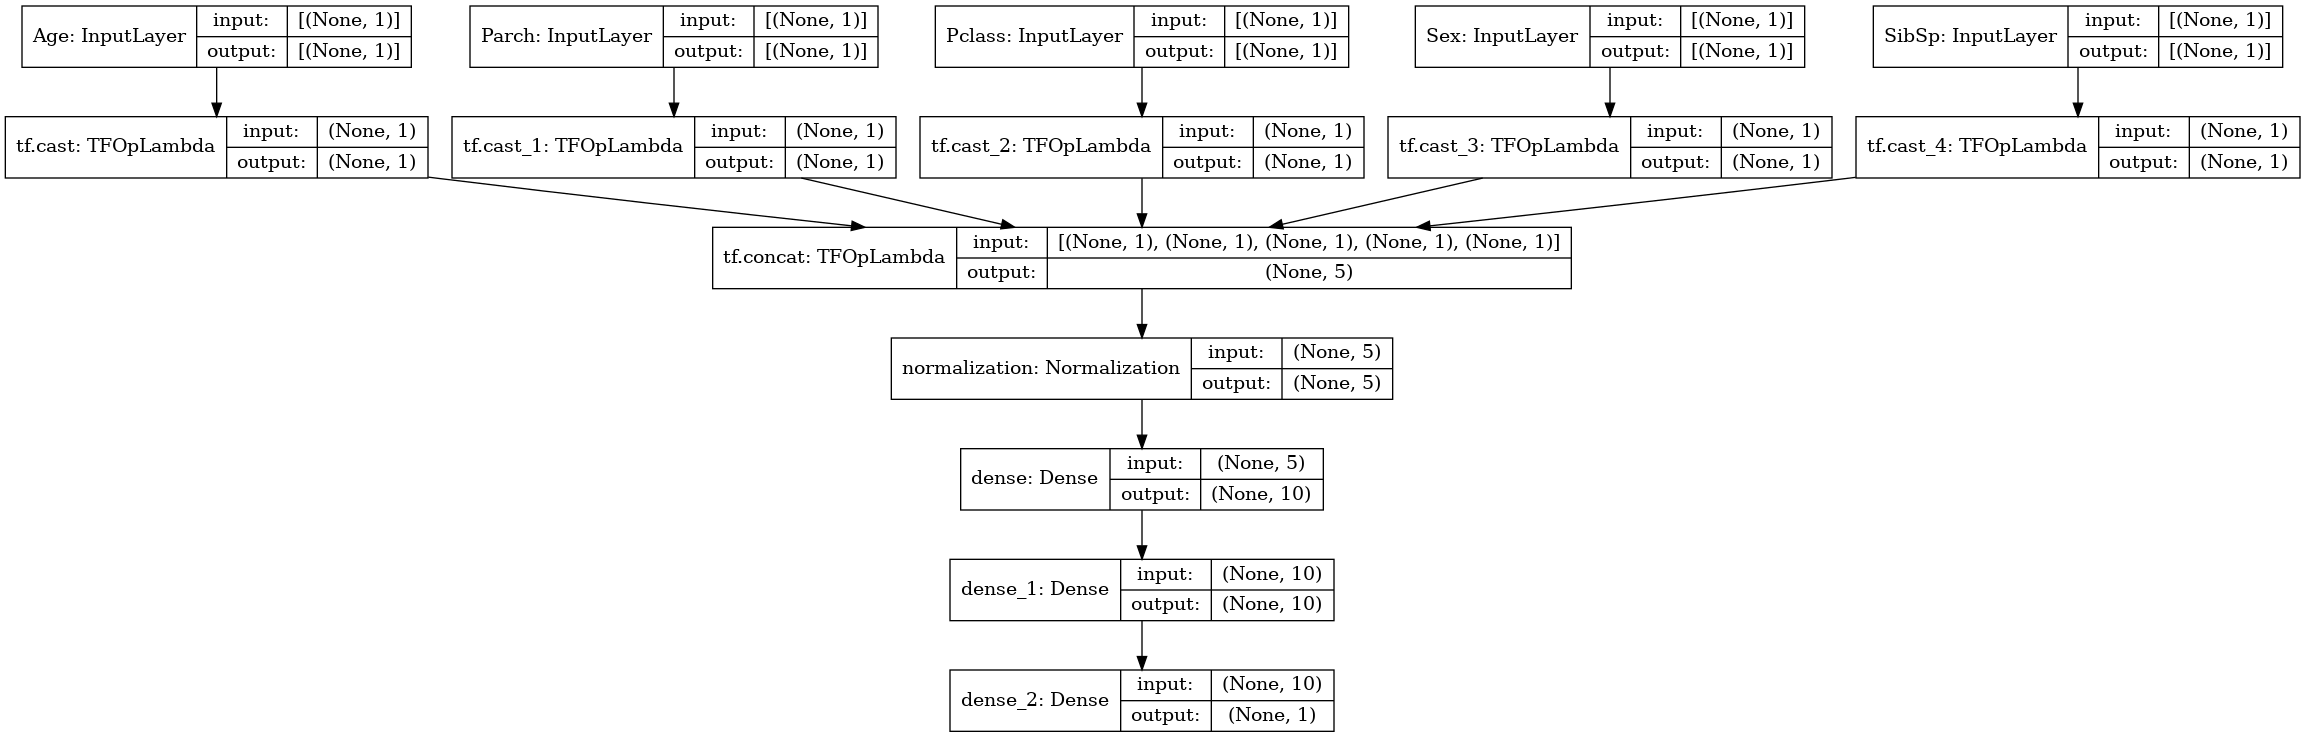

In [9]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])

In [12]:
history = model.fit(input_features, output_features , batch_size=8, epochs=128, validation_split=0.2)

Epoch 1/128
19/19 [==============================] - 0s 7ms/step - loss: 0.3480 - accuracy: 0.8082 - val_loss: 0.7446 - val_accuracy: 0.7568
Epoch 2/128
19/19 [==============================] - 0s 5ms/step - loss: 0.3456 - accuracy: 0.8151 - val_loss: 0.7444 - val_accuracy: 0.7568
Epoch 3/128
19/19 [==============================] - 0s 5ms/step - loss: 0.3516 - accuracy: 0.8219 - val_loss: 0.7569 - val_accuracy: 0.7568
Epoch 4/128
19/19 [==============================] - 0s 5ms/step - loss: 0.3485 - accuracy: 0.8219 - val_loss: 0.7532 - val_accuracy: 0.7568
Epoch 5/128
19/19 [==============================] - 0s 5ms/step - loss: 0.3487 - accuracy: 0.8219 - val_loss: 0.7493 - val_accuracy: 0.7568
Epoch 6/128
19/19 [==============================] - 0s 5ms/step - loss: 0.3474 - accuracy: 0.8151 - val_loss: 0.7459 - val_accuracy: 0.7568
Epoch 7/128
19/19 [==============================] - 0s 5ms/step - loss: 0.3434 - accuracy: 0.8356 - val_loss: 0.7465 - val_accuracy: 0.7568
Epoch 8/128
1